# Support Vector Machines- Salary Data
Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [63]:
train = pd.read_csv('D:/DS_Assignments/17_Support_Vector_Machines/SalaryData_Train(1).csv')

In [64]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [65]:
test = pd.read_csv('D:/DS_Assignments/17_Support_Vector_Machines/SalaryData_Test(1).csv')

In [66]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [67]:
train.shape

(30161, 14)

In [68]:
test.shape

(15060, 14)

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
age              30161 non-null int64
workclass        30161 non-null object
education        30161 non-null object
educationno      30161 non-null int64
maritalstatus    30161 non-null object
occupation       30161 non-null object
relationship     30161 non-null object
race             30161 non-null object
sex              30161 non-null object
capitalgain      30161 non-null int64
capitalloss      30161 non-null int64
hoursperweek     30161 non-null int64
native           30161 non-null object
Salary           30161 non-null object
dtypes: int64(5), object(9)
memory usage: 2.2+ MB


In [70]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
age              15060 non-null int64
workclass        15060 non-null object
education        15060 non-null object
educationno      15060 non-null int64
maritalstatus    15060 non-null object
occupation       15060 non-null object
relationship     15060 non-null object
race             15060 non-null object
sex              15060 non-null object
capitalgain      15060 non-null int64
capitalloss      15060 non-null int64
hoursperweek     15060 non-null int64
native           15060 non-null object
Salary           15060 non-null object
dtypes: int64(5), object(9)
memory usage: 1.1+ MB


In [71]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [73]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [74]:
train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.043525,0.080152,0.060278,0.101598
educationno,0.043525,1.000000,0.124416,0.079691,0.152522
capitalgain,0.080152,0.124416,1.000000,-0.032218,0.080431
capitalloss,0.060278,0.079691,-0.032218,1.000000,0.052454
hoursperweek,0.101598,0.152522,0.080431,0.052454,1.000000


In [75]:
test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.026123,0.078760,0.057745,0.102758
educationno,0.026123,1.000000,0.131750,0.085817,0.133691
capitalgain,0.078760,0.131750,1.000000,-0.031876,0.090501
capitalloss,0.057745,0.085817,-0.031876,1.000000,0.057712
hoursperweek,0.102758,0.133691,0.090501,0.057712,1.000000


## Data Preprocessing

In [60]:
lb = LabelEncoder()

In [76]:
train["workclass"] = lb.fit_transform(train["workclass"])
train["education"] = lb.fit_transform(train["education"])
train["maritalstatus"] = lb.fit_transform(train["maritalstatus"])
train["occupation"] = lb.fit_transform(train["occupation"])
train["relationship"] = lb.fit_transform(train["relationship"])
train["race"] = lb.fit_transform(train["race"])
train["sex"] = lb.fit_transform(train["sex"])
train["native"] = lb.fit_transform(train["native"])
train["Salary"] = lb.fit_transform(train["Salary"])

In [77]:
test["workclass"] = lb.fit_transform(test["workclass"])
test["education"] = lb.fit_transform(test["education"])
test["maritalstatus"] = lb.fit_transform(test["maritalstatus"])
test["occupation"] = lb.fit_transform(test["occupation"])
test["relationship"] = lb.fit_transform(test["relationship"])
test["race"] = lb.fit_transform(test["race"])
test["sex"] = lb.fit_transform(test["sex"])
test["native"] = lb.fit_transform(test["native"])
test["Salary"] = lb.fit_transform(test["Salary"])

## EDA

In [78]:
train = train.iloc[: 2000, :]

In [79]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
age              2000 non-null int64
workclass        2000 non-null int32
education        2000 non-null int32
educationno      2000 non-null int64
maritalstatus    2000 non-null int32
occupation       2000 non-null int32
relationship     2000 non-null int32
race             2000 non-null int32
sex              2000 non-null int32
capitalgain      2000 non-null int64
capitalloss      2000 non-null int64
hoursperweek     2000 non-null int64
native           2000 non-null int32
Salary           2000 non-null int32
dtypes: int32(9), int64(5)
memory usage: 148.5 KB


In [80]:
test = test.iloc[: 1300, :]

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
age              1300 non-null int64
workclass        1300 non-null int32
education        1300 non-null int32
educationno      1300 non-null int64
maritalstatus    1300 non-null int32
occupation       1300 non-null int32
relationship     1300 non-null int32
race             1300 non-null int32
sex              1300 non-null int32
capitalgain      1300 non-null int64
capitalloss      1300 non-null int64
hoursperweek     1300 non-null int64
native           1300 non-null int32
Salary           1300 non-null int32
dtypes: int32(9), int64(5)
memory usage: 96.5 KB


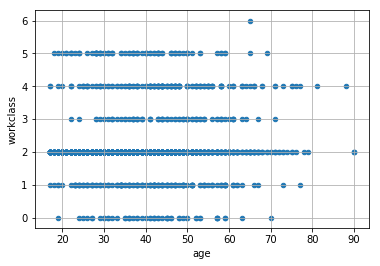

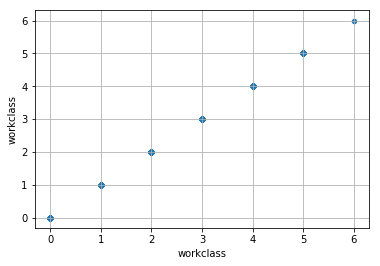

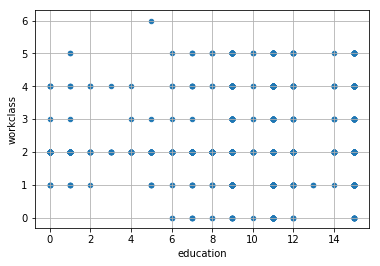

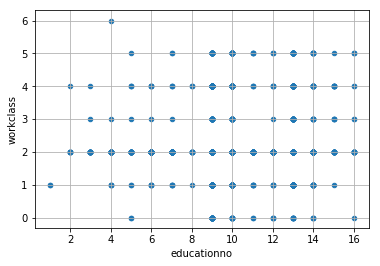

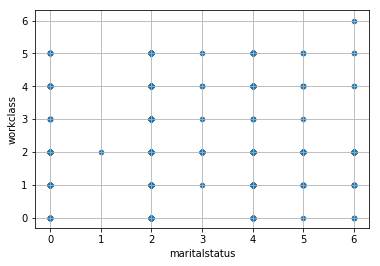

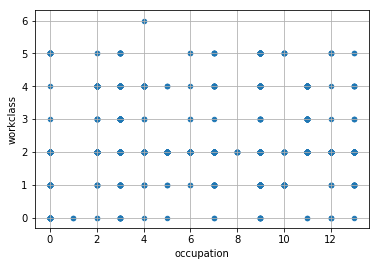

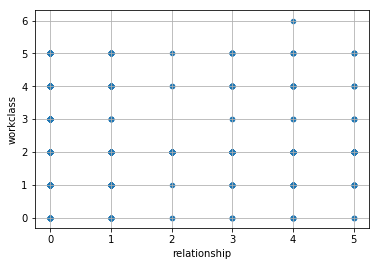

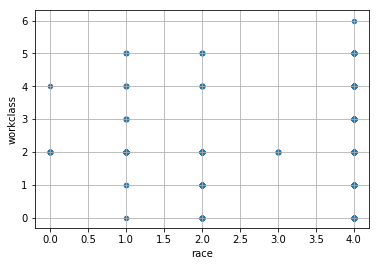

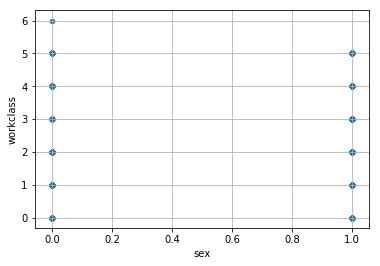

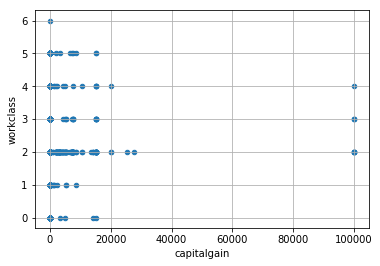

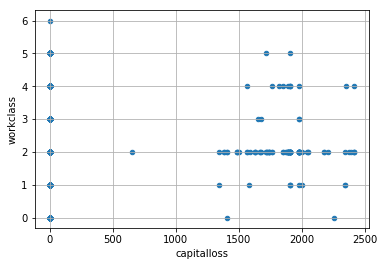

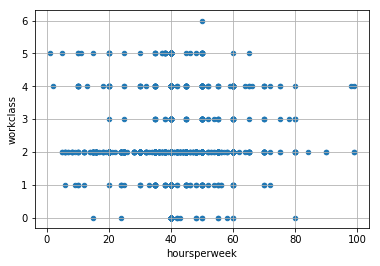

In [82]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'workclass',grid=True)

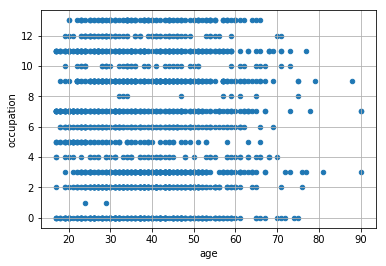

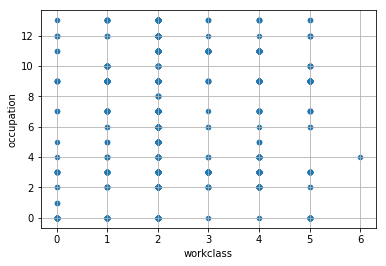

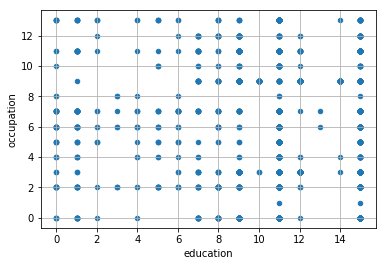

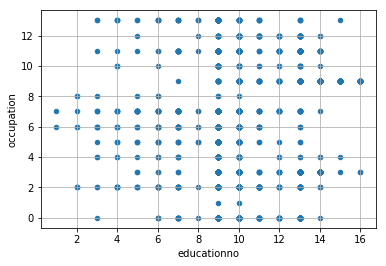

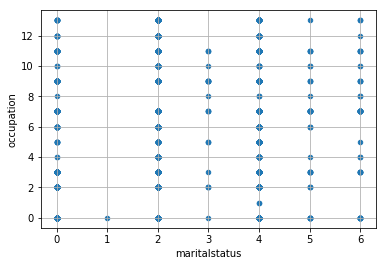

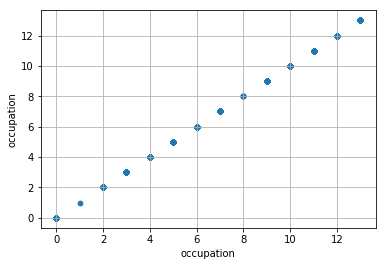

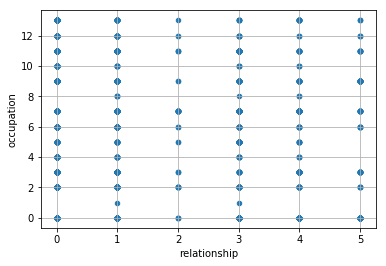

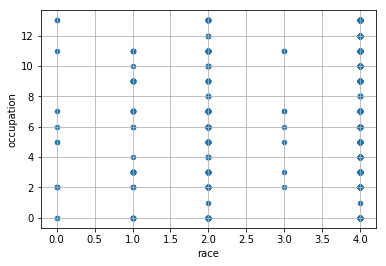

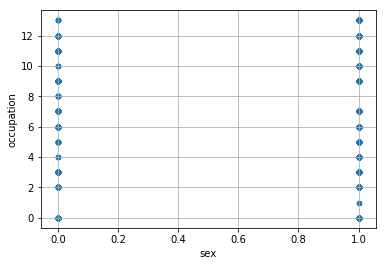

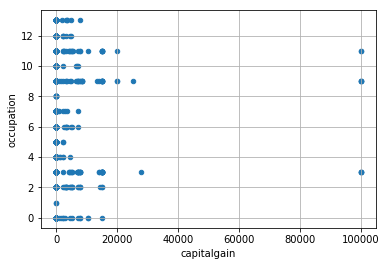

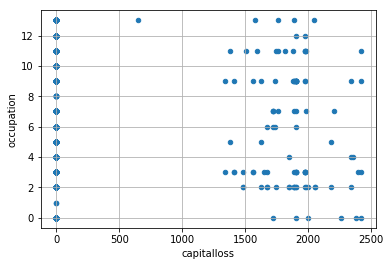

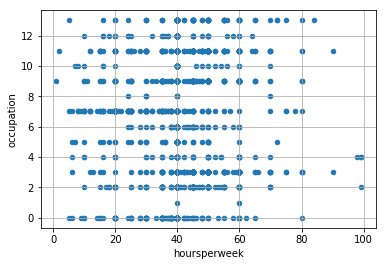

In [83]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'occupation',grid=True)

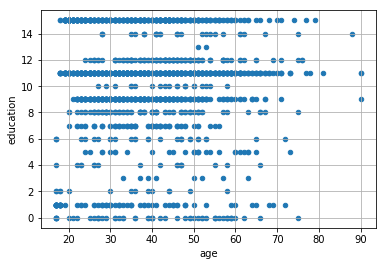

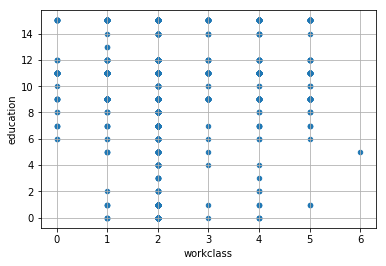

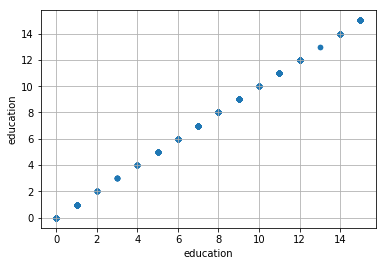

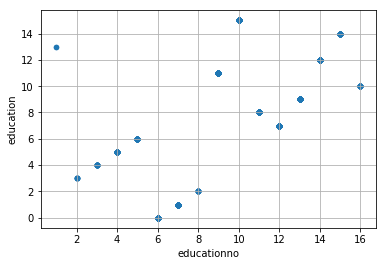

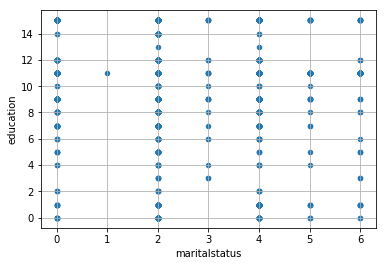

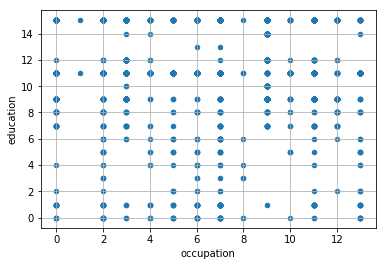

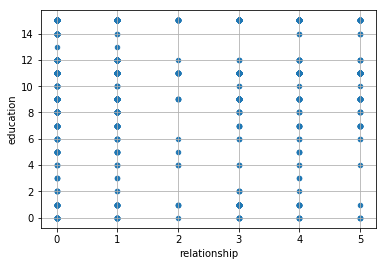

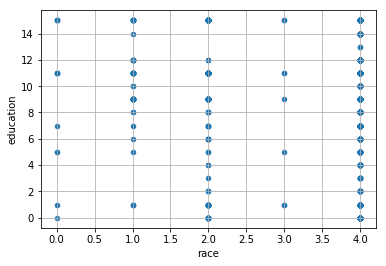

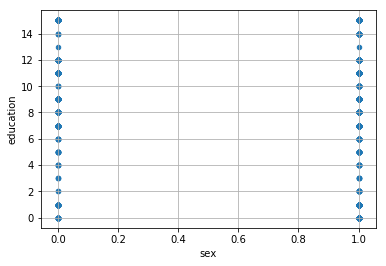

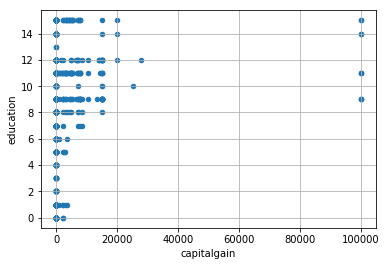

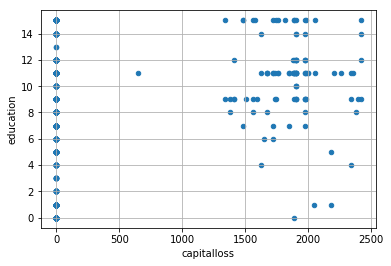

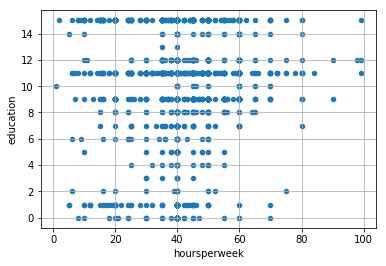

In [84]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'education',grid=True)

In [85]:
train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.080136,-0.004007,0.014781,-0.249467,-0.004634,-0.216588,0.015168,0.050730,0.081112,0.058997,0.114429,-0.001914,0.231176
workclass,0.080136,1.000000,0.029167,0.068866,-0.043219,0.033209,-0.074186,0.074418,0.087332,0.038314,-0.003069,0.031221,-0.036263,0.064561
education,-0.004007,0.029167,1.000000,0.328746,-0.047668,-0.028564,-0.033833,0.031098,-0.004879,0.035363,0.012082,0.060470,0.085718,0.051282
educationno,0.014781,0.068866,0.328746,1.000000,-0.062303,0.098459,-0.091217,0.075867,0.034123,0.095804,0.062601,0.172302,0.057602,0.308324
maritalstatus,-0.249467,-0.043219,-0.047668,-0.062303,1.000000,0.075036,0.157226,-0.083280,-0.078456,-0.044395,-0.016550,-0.187437,0.002006,-0.199289
occupation,-0.004634,0.033209,-0.028564,0.098459,0.075036,1.000000,-0.065478,0.035830,0.072483,0.016453,-0.015165,0.032509,-0.000106,0.026793
relationship,-0.216588,-0.074186,-0.033833,-0.091217,0.157226,-0.065478,1.000000,-0.100663,-0.557999,-0.052849,-0.042243,-0.256052,-0.054397,-0.211663
race,0.015168,0.074418,0.031098,0.075867,-0.083280,0.035830,-0.100663,1.000000,0.076281,0.018565,0.043238,0.065593,0.155655,0.068448
sex,0.050730,0.087332,-0.004879,0.034123,-0.078456,0.072483,-0.557999,0.076281,1.000000,0.030977,0.049696,0.205762,0.029781,0.182859
capitalgain,0.081112,0.038314,0.035363,0.095804,-0.044395,0.016453,-0.052849,0.018565,0.030977,1.000000,-0.033968,0.064462,-0.028919,0.220183


In [86]:
test.corr()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.132698,-0.058456,-0.028238,-0.299098,-0.035747,-0.253358,0.003103,0.074865,0.107361,0.057418,0.106105,0.018697,0.226220
workclass,0.132698,1.000000,0.068824,0.066220,-0.060726,0.011914,-0.082095,0.065081,0.049687,0.053677,0.062026,0.077106,0.043338,0.077615
education,-0.058456,0.068824,1.000000,0.409201,-0.039852,-0.023030,-0.024427,-0.005501,-0.011597,0.060160,0.038734,0.063598,0.069760,0.119016
educationno,-0.028238,0.066220,0.409201,1.000000,-0.091147,0.077972,-0.050679,0.072135,-0.011529,0.170971,0.111713,0.145317,0.106144,0.313422
maritalstatus,-0.299098,-0.060726,-0.039852,-0.091147,1.000000,-0.012545,0.197796,-0.085572,-0.147099,-0.071843,-0.018926,-0.161722,0.005488,-0.226209
occupation,-0.035747,0.011914,-0.023030,0.077972,-0.012545,1.000000,-0.063657,0.037160,0.073262,0.004247,-0.038230,0.018785,0.004193,0.018910
relationship,-0.253358,-0.082095,-0.024427,-0.050679,0.197796,-0.063657,1.000000,-0.158517,-0.588370,-0.060524,-0.037262,-0.298815,0.015321,-0.259728
race,0.003103,0.065081,-0.005501,0.072135,-0.085572,0.037160,-0.158517,1.000000,0.072954,0.017319,0.064287,0.058017,0.160356,0.076017
sex,0.074865,0.049687,-0.011597,-0.011529,-0.147099,0.073262,-0.588370,0.072954,1.000000,0.070784,0.053486,0.233998,-0.037813,0.206553
capitalgain,0.107361,0.053677,0.060160,0.170971,-0.071843,0.004247,-0.060524,0.017319,0.070784,1.000000,-0.036077,0.128418,0.032191,0.249281


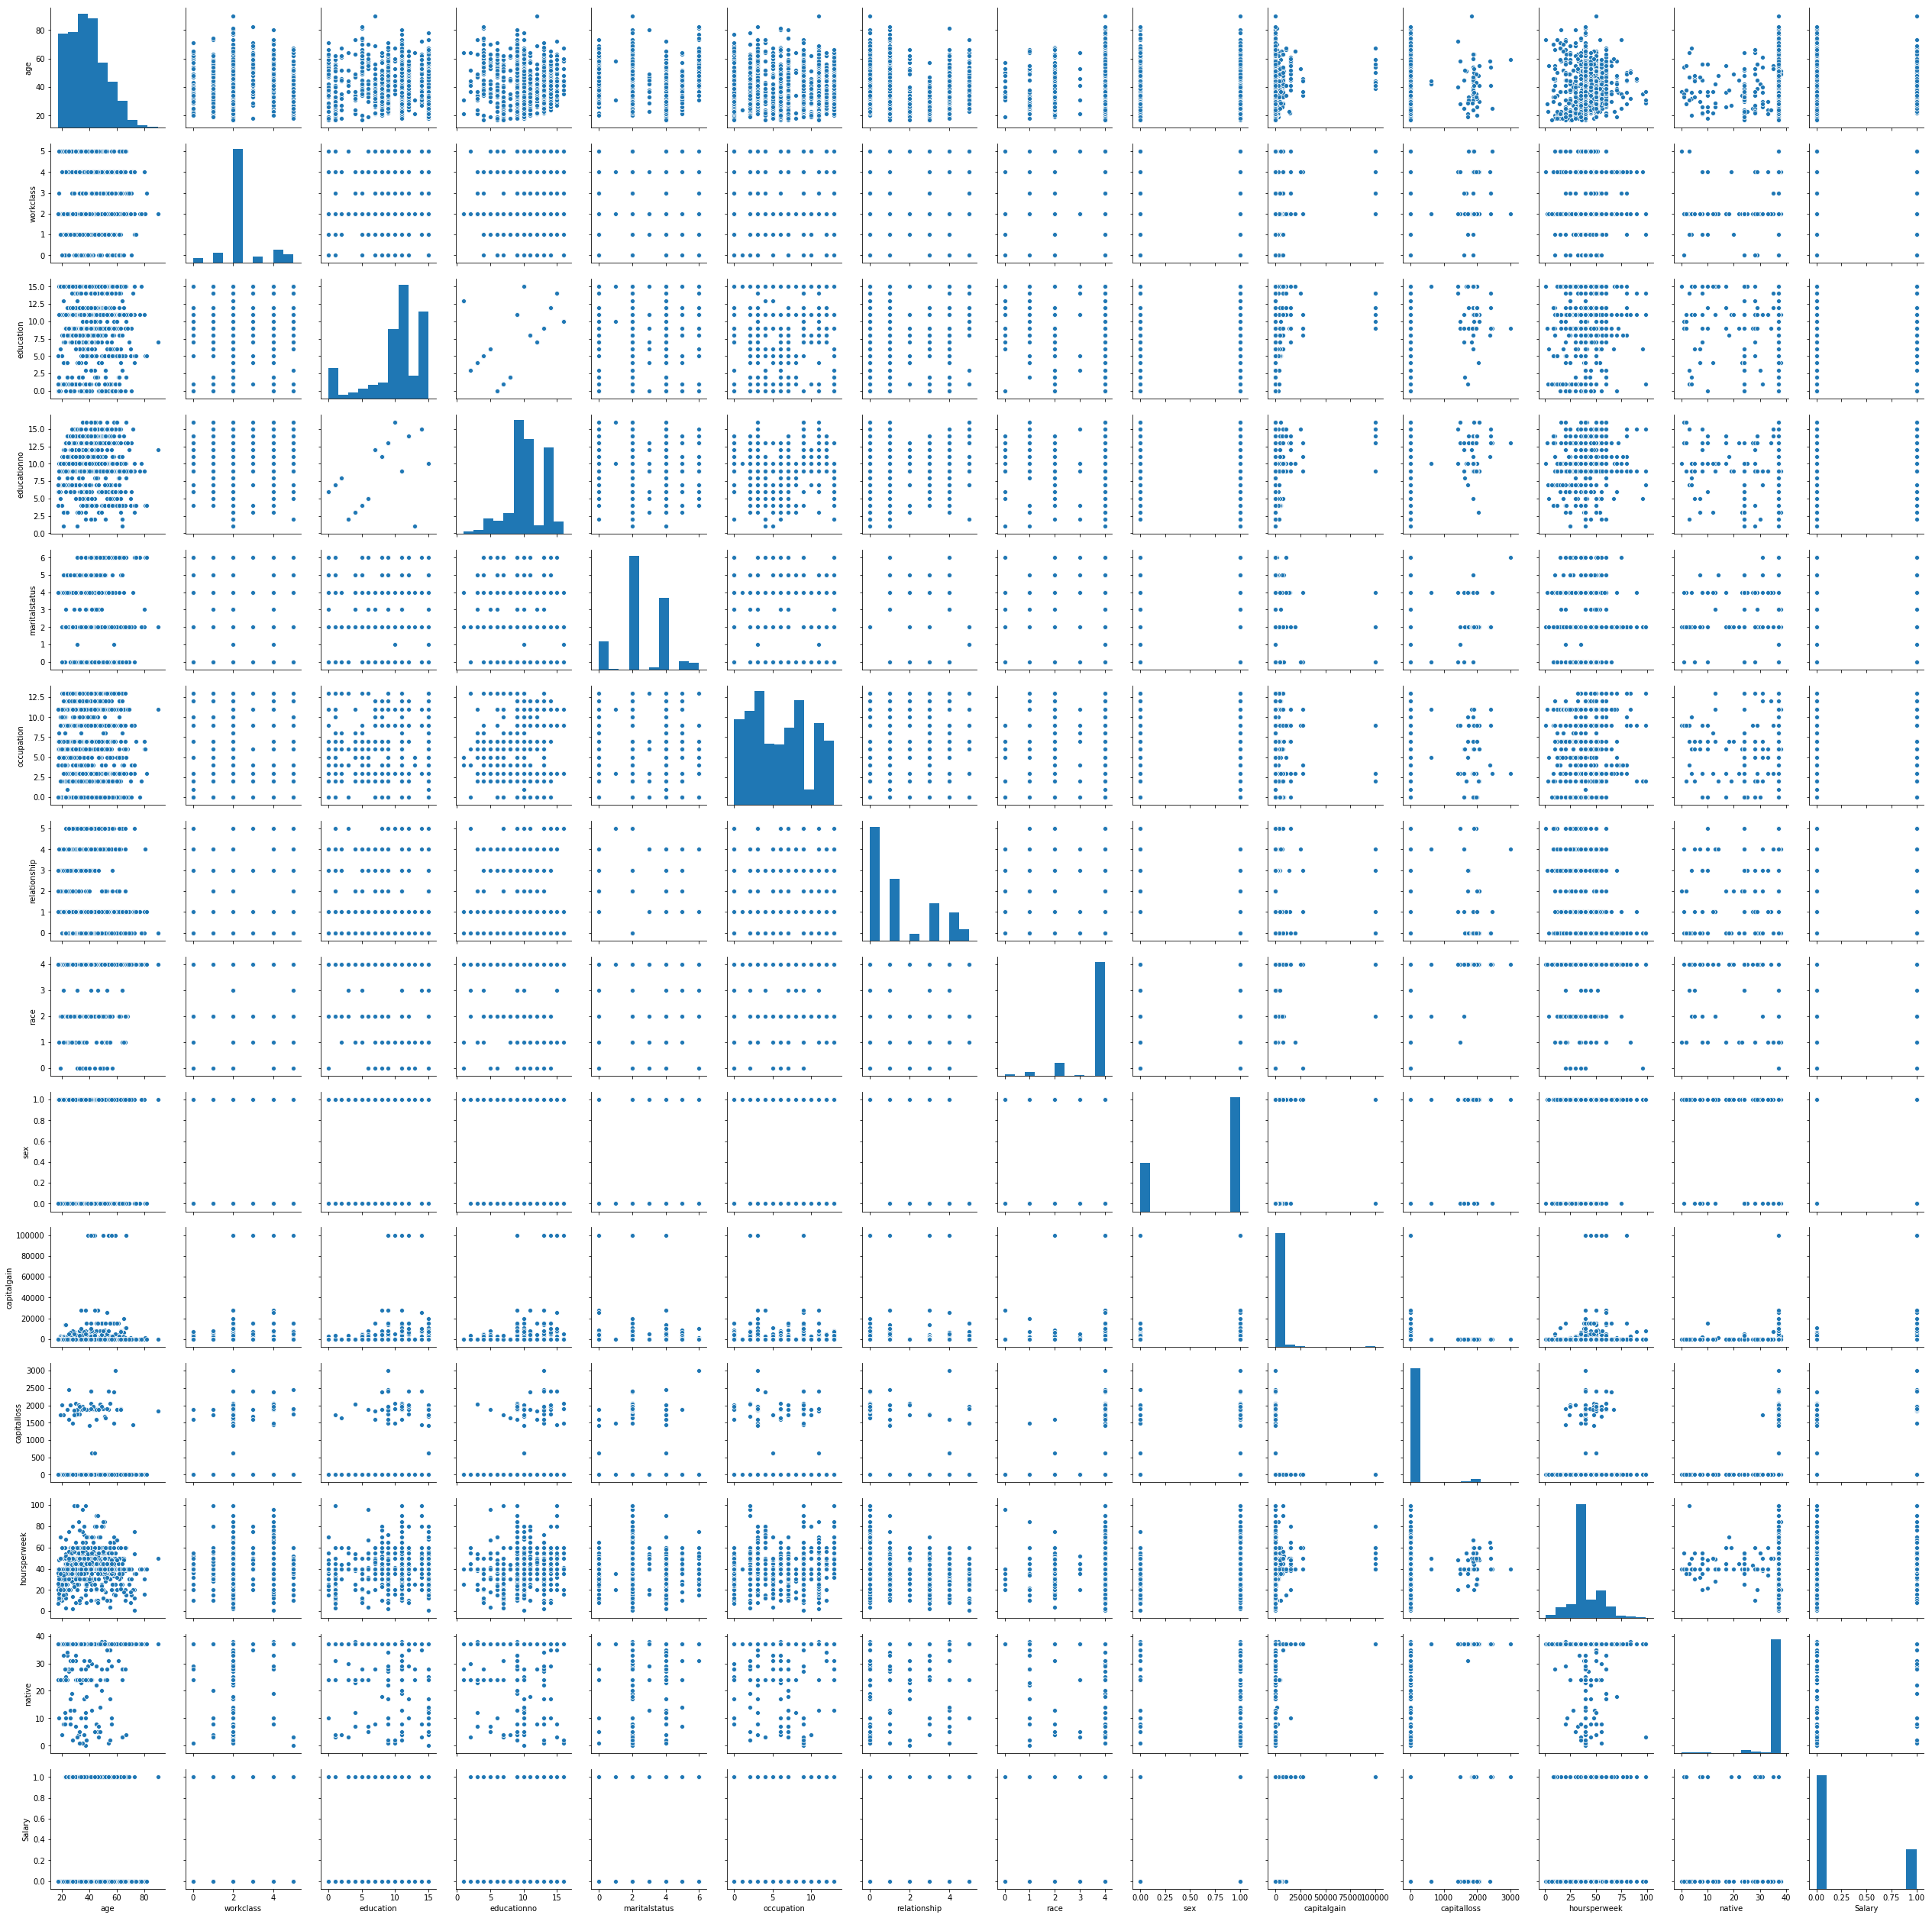

In [87]:
sns.pairplot(test)

## Data spliting

In [88]:
X_train=train.iloc[:,:-1]
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
5,37,2,12,14,2,3,5,4,0,0,0,40,37
6,49,2,6,5,3,7,1,2,0,0,0,16,21
7,52,4,11,9,2,3,0,4,1,0,0,45,37
8,31,2,12,14,4,9,1,4,0,14084,0,50,37
9,42,2,9,13,2,3,0,4,1,5178,0,40,37


In [89]:
y_train=train.iloc[:,-1]
y_train

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       1
9       1
10      1
11      1
12      0
13      0
14      0
15      0
16      0
17      0
18      1
19      1
20      0
21      0
22      0
23      0
24      1
25      0
26      0
27      0
28      0
29      0
       ..
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    1
1981    0
1982    0
1983    1
1984    1
1985    1
1986    1
1987    0
1988    0
1989    0
1990    0
1991    1
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    1
Name: Salary, Length: 2000, dtype: int32

In [90]:
X_test=test.iloc[:,:-1]
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
5,63,4,14,15,2,9,0,4,1,3103,0,32,37
6,24,2,15,10,4,7,4,4,0,0,0,40,37
7,55,2,5,4,2,2,0,4,1,0,0,10,37
8,65,2,11,9,2,6,0,4,1,6418,0,40,37
9,36,0,9,13,2,0,0,4,1,0,0,40,37


In [91]:
y_test = test.iloc[:,-1]
y_test

0       0
1       0
2       1
3       1
4       0
5       1
6       0
7       0
8       1
9       0
10      0
11      1
12      1
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      1
21      0
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
1270    1
1271    1
1272    1
1273    1
1274    0
1275    0
1276    0
1277    1
1278    0
1279    0
1280    1
1281    0
1282    1
1283    0
1284    0
1285    0
1286    0
1287    0
1288    0
1289    0
1290    0
1291    1
1292    1
1293    0
1294    1
1295    0
1296    0
1297    0
1298    0
1299    0
Name: Salary, Length: 1300, dtype: int32

In [92]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 13), (2000,), (1300, 13), (1300,))

## SVM

In [93]:
model = SVC()

model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Predicting model

In [94]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Model Evaluation

In [95]:
print(confusion_matrix(y_test, y_pred))

[[927  39]
 [296  38]]


In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       966
           1       0.49      0.11      0.18       334

   micro avg       0.74      0.74      0.74      1300
   macro avg       0.63      0.54      0.52      1300
weighted avg       0.69      0.74      0.68      1300



Inference
Model is not predicting well, so we will improve the model by hyperparameter tunning using grid search method.

## Improving Model using Grid Search CV

In [97]:
param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}

In [98]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)

In [99]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] kernel=rbf, C=1, gamma=1 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... kernel=rbf, C=1, gamma=1, score=0.750623441397, total=   1.2s
[CV] kernel=rbf, C=1, gamma=1 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ............. kernel=rbf, C=1, gamma=1, score=0.75, total=   0.7s
[CV] kernel=rbf, C=1, gamma=1 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] ............ kernel=rbf, C=1, gamma=1, score=0.745, total=   0.6s
[CV] kernel=rbf, C=1, gamma=1 ........................................
[CV] ............ kernel=rbf, C=1, gamma=1, score=0.745, total=   0.5s
[CV] kernel=rbf, C=1, gamma=1 ........................................
[CV] ... kernel=rbf, C=1, gamma=1, score=0.744360902256, total=   0.4s
[CV] kernel=rbf, C=1, gamma=0.1 ......................................
[CV] . kernel=rbf, C=1, gamma=0.1, score=0.745635910224, total=   0.3s
[CV] kernel=rbf, C=1, gamma=0.1 ......................................
[CV] ......... kernel=rbf, C=1, gamma=0.1, score=0.7375, total=   0.2s
[CV] kernel=rbf, C=1, gamma=0.1 ......................................
[CV] ......... kernel=rbf, C=1, gamma=0.1, score=0.7375, total=   0.2s
[CV] kernel=rbf, C=1, gamma=0.1 ......................................
[CV] ......... kernel=rbf, C=1, gamma=0.1, score=0.7575, total=   0.2s
[CV] kernel=rbf, C=1, gamma=0.1 ......................................
[CV] .

[CV]  kernel=rbf, C=10, gamma=0.01, score=0.783042394015, total=   0.1s
[CV] kernel=rbf, C=10, gamma=0.01 ....................................
[CV] ....... kernel=rbf, C=10, gamma=0.01, score=0.8175, total=   0.0s
[CV] kernel=rbf, C=10, gamma=0.01 ....................................
[CV] ......... kernel=rbf, C=10, gamma=0.01, score=0.79, total=   0.0s
[CV] kernel=rbf, C=10, gamma=0.01 ....................................
[CV] ....... kernel=rbf, C=10, gamma=0.01, score=0.8125, total=   0.0s
[CV] kernel=rbf, C=10, gamma=0.01 ....................................
[CV]  kernel=rbf, C=10, gamma=0.01, score=0.789473684211, total=   0.0s
[CV] kernel=rbf, C=10, gamma=0.001 ...................................
[CV]  kernel=rbf, C=10, gamma=0.001, score=0.815461346633, total=   0.0s
[CV] kernel=rbf, C=10, gamma=0.001 ...................................
[CV] ...... kernel=rbf, C=10, gamma=0.001, score=0.8175, total=   0.0s
[CV] kernel=rbf, C=10, gamma=0.001 ...................................
[C

[CV] ........ kernel=rbf, C=20, gamma=0.001, score=0.81, total=   0.0s
[CV] kernel=rbf, C=20, gamma=0.001 ...................................
[CV]  kernel=rbf, C=20, gamma=0.001, score=0.824561403509, total=   0.0s
[CV] kernel=rbf, C=20, gamma=0.0001 ..................................
[CV]  kernel=rbf, C=20, gamma=0.0001, score=0.798004987531, total=   0.0s
[CV] kernel=rbf, C=20, gamma=0.0001 ..................................
[CV] ....... kernel=rbf, C=20, gamma=0.0001, score=0.81, total=   0.1s
[CV] kernel=rbf, C=20, gamma=0.0001 ..................................
[CV] ..... kernel=rbf, C=20, gamma=0.0001, score=0.8125, total=   0.0s
[CV] kernel=rbf, C=20, gamma=0.0001 ..................................
[CV] ..... kernel=rbf, C=20, gamma=0.0001, score=0.8175, total=   0.1s
[CV] kernel=rbf, C=20, gamma=0.0001 ..................................
[CV]  kernel=rbf, C=20, gamma=0.0001, score=0.817042606516, total=   0.0s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   43.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf'], 'C': [1, 5, 10, 15, 20], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [100]:
grid.best_params_

{'C': 15, 'gamma': 0.001, 'kernel': 'rbf'}

In [101]:
grid_pred = grid.predict(X_test)

## Model Evaluation

In [102]:
grid_pred


array([0, 0, 0, ..., 0, 0, 0])

In [103]:
print(confusion_matrix(y_test, grid_pred))

[[938  28]
 [198 136]]


In [104]:
print(classification_report(y_test, grid_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       966
           1       0.83      0.41      0.55       334

   micro avg       0.83      0.83      0.83      1300
   macro avg       0.83      0.69      0.72      1300
weighted avg       0.83      0.83      0.80      1300



# Inference
So, using grid search method, we improved our model accuracy from 0.79 to 0.83